In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats

### **1. Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5. Create another 1000 samples from another independent Gaussian with mean 10 and standard deviation 5.**
(a) Take the sum of 2 these Gaussians by adding the two sets of 1000 points, point by point, and plot the histogram of the resulting 1000 points. What do you observe?  

(b) Estimate the mean and the variance of the sum.

In [9]:
mu = -10
sigma = 5
sample1 = np.random.normal(mu, sigma, 1000)
sample2 = np.random.normal(mu, sigma, 1000)

# df = pd.DataFrame()
# df['sample 1'] = sample1
# df['sample 2'] = sample2
sample_sum = sample1 + sample2

In [10]:
np.size(sample_sum)

1000

(array([  1.,  13.,  40., 115., 172., 246., 220., 133.,  46.,  14.]),
 array([-4.48773170e+01, -4.03879857e+01, -3.58986544e+01, -3.14093231e+01,
        -2.69199919e+01, -2.24306606e+01, -1.79413293e+01, -1.34519980e+01,
        -8.96266669e+00, -4.47333540e+00,  1.59958900e-02]),
 <a list of 10 Patch objects>)

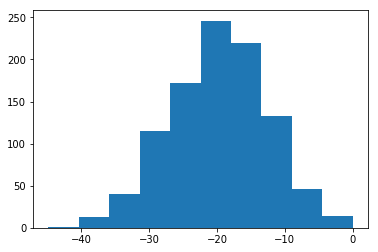

In [11]:
# df['sum sample'] = df['sample 1'] + df['sample 2']
plt.hist(sample_sum)

In [12]:
sample_sum.mean()

-19.71314653540794

In [13]:
sample_sum.var()

50.57432072363941

In [14]:
mean = np.sum(sample_sum) / np.size(sample_sum)
variance = sum([(x - mean) ** 2 for x in sample_sum]) / (len(sample_sum))
print('Mean estimate is\t {}\nVariance estimate is\t  {}'.format(mean, variance))

Mean estimate is	 -19.71314653540794
Variance estimate is	  50.57432072363941


### 2. Central Limit Theorem Let $X_i$ be an [iid](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables) Bernoulli random variable with value {-1,1}. Look at the random variable $Z_n = \frac{1}{\sqrt{n}}\sum X_{i}$ 
#### By taking 1000 draws from $Z_n$, plot its histogram. Check that for small $n$ (say, 5-10) $Z_n$ does not look that much like a Gaussian, but when $n$ is bigger (already by the time $n$ = 30 or 50) it looks much more like a Gaussian. Check also for much bigger $n$: $n$ = 250, to see that at this point, one can really see the bell curve

In [15]:
def getSumXi(n): return sum(np.random.choice((-1,1),n))
def getZn(n): return (1/(sqrt(n)) * getSumXi(n))
def getZnArray(n):
    values = []
    for i in range(1000):
        values.append(getZn(n))
    return np.array(values)

(array([ 30.,   0., 142., 312.,   0., 328.,   0., 163.,   0.,  25.]),
 array([-2.23606798, -1.78885438, -1.34164079, -0.89442719, -0.4472136 ,
         0.        ,  0.4472136 ,  0.89442719,  1.34164079,  1.78885438,
         2.23606798]),
 <a list of 10 Patch objects>)

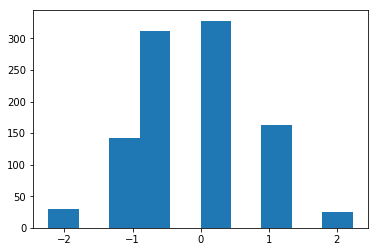

In [16]:
values = getZnArray(5)
plt.hist(values)

(array([  2.,   5.,  41., 130., 263., 287., 176.,  75.,  19.,   2.]),
 array([-3.65148372, -2.95770181, -2.2639199 , -1.570138  , -0.87635609,
        -0.18257419,  0.51120772,  1.20498963,  1.89877153,  2.59255344,
         3.28633535]),
 <a list of 10 Patch objects>)

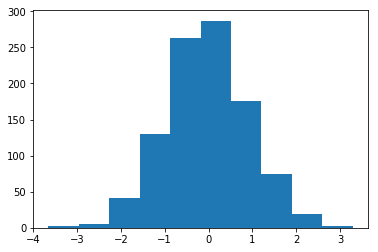

In [17]:
values = getZnArray(30)
plt.hist(values)

(array([  9.,  26.,  73., 135., 210., 304., 135.,  62.,  35.,  11.]),
 array([-3.11126984, -2.48901587, -1.8667619 , -1.24450793, -0.62225397,
         0.        ,  0.62225397,  1.24450793,  1.8667619 ,  2.48901587,
         3.11126984]),
 <a list of 10 Patch objects>)

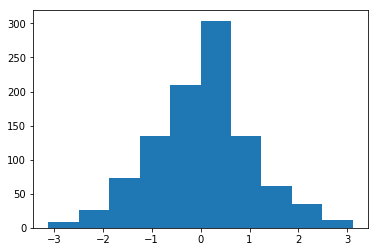

In [18]:
values = getZnArray(50)
plt.hist(values)

(array([ 10.,  28., 110., 238., 236., 198., 127.,  41.,  11.,   1.]),
 array([-2.78280434, -2.16299792, -1.5431915 , -0.92338508, -0.30357866,
         0.31622777,  0.93603419,  1.55584061,  2.17564703,  2.79545345,
         3.41525987]),
 <a list of 10 Patch objects>)

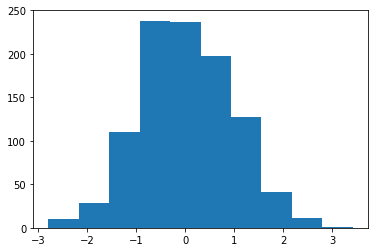

In [19]:
values = getZnArray(250)
plt.hist(values)

### 3. Estimate the mean and standard deviation from 1 dimensional data: generate 25,000 samples from a Gaussian distribution with mean 0 and standard deviation 5. Then estimate the mean and standard deviation of this gaussian using elementary numpy commands, i.e., addition,multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

In [25]:
mu = 0
sigma = 5
sample = np.random.normal(mu, sigma, 25000)

In [26]:
mean = np.sum(sample) / np.size(sample)
mean

-0.02686826533160541

In [27]:
std_deviation = sqrt(sum([(i - mean) ** 2 for i in sample]) / (len(sample)-1))
print(std_deviation)

4.997644215858252


### 4. Estimate the mean and covariance matrix for multi-dimensional data: generate 10,000 samples of 2 dimensional data from the Gaussian distribution $$\left(\begin{array}{cc} 
X_i\\ Y_i \end{array}\right) 
\sim N \left(\begin{array}{cc} 
\left(\begin{array}{cc} -5\\5 \end{array}\right)
\left(\begin{array}{cc}20 & .8\\ .8 & 30\end{array}\right)
\end{array}\right)$$
#### Then, estimate the mean and covariance matrix for this multi-dimensional data using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation). (Recall: this notation is a compact way of specifying the distribution of two Gaussian random variables that are correlated. Specifically, the notation indicates that X has mean −5 and variance 20, Y has mean 5 and variance 30, and the covariance of X and Y is 0.8, i.e., $E[(X + 5)(Y − 5)] = 0.8$.)

In [28]:
mean = [-5,5]
cov = [[20,.8],[.8,30]]
matrix = np.random.multivariate_normal(mean, cov, 10000)

n = len(matrix)

df = pd.DataFrame(matrix, columns = ["x","y"])
## Determine actual values of means, variances and covariances
df.x.mean(), df.x.var(), df.y.mean(), df.y.var(), df.cov()
matrix

array([[-4.47440502, 12.75226028],
       [-1.97288677,  5.00477188],
       [-6.53394519,  2.81649419],
       ...,
       [-1.88121653,  6.37427292],
       [-2.33801343, 15.10535516],
       [ 3.12269273,  1.5133836 ]])

In [29]:
meanMatrix = [x/n for x in np.sum(matrix, axis=0)]
meanMatrix

[-5.04039967599779, 4.936903748698621]

In [30]:
def getCovMatrix(mtx, avmtx):
    variances = []
    for i in range(len(mtx)):
        variance = [(mtx[i][0]-avmtx[0])**2, ##Variance of X
                    (mtx[i][0]-avmtx[0])*(mtx[i][1]-avmtx[1]), ##Covariance of x and y
                    (mtx[i][1]-avmtx[1])*(mtx[i][0]-avmtx[0]), ##Covariance of y and x
                    (mtx[i][1]-avmtx[1])**2 ##Variance of Y
                   ]
        variances.append(variance)
    varianceSummation = np.sum(variances, axis=0)
    xx,yx,xy,yy = 0,1,2,3
    newN = n-1
    covMtx = [
                [varianceSummation[xx]/(newN), varianceSummation[yx]/(newN)],
                [varianceSummation[xy]/(newN), varianceSummation[yy]/(newN)]
             ]
    return covMtx
getCovMatrix(matrix,meanMatrix)

[[20.25250870344999, 0.5930853830284503],
 [0.5930853830284503, 30.224111331855294]]

### 5. Download from Canvas/Files the dataset PatientData.csv.
#### Each row is a patient and the last column is the condition that the patient has. Do data exploration using Pandas and other visualization tools to understand what you can about the dataset. For example:
(a) How many patients and how many features are there?

There are 452 patients and 280 features.

(b) What is the meaning of the first 4 features? See if you can understand what they mean.

The first feature is age. 

The second feature is sex. 

The third feature is height (cm).

The fourth feature is weight (kg). 

(c) Are there missing values? Replace them with the average of the corresponding feature column

Yes

(d) How could you test which features strongly influence the patient condition and which do not?

We can use corelation to test. The top three most important features are column 90, 4 and 92.


#### List what you think are the three most important features

In [34]:
# Part (a)
data = pd.read_csv("PatientData.csv", header = None)
df = pd.DataFrame(data) 
df

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
5,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
6,40,1,160,52,77,129,377,133,77,77,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1
7,49,1,162,54,78,0,376,157,70,67,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1
8,44,0,168,56,84,118,354,160,63,61,...,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,1
9,50,1,167,67,89,130,383,156,73,85,...,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1,10


In [36]:
# Part C
df.replace('?',np.nan, inplace=True)

In [37]:
# Part C continued
df_missing = df.dropna(how = 'any')
df_mean = df_missing.mean(axis = 0)
df.fillna(df_mean, inplace = True)

In [38]:
# Part D
corr_matrix = df.corr()
corr_matrix[279].sort_values(ascending=False).head(4)

279    1.000000
90     0.368876
4      0.323879
92     0.313982
Name: 279, dtype: float64

### 1. Consider two random variables X,Y that are not independent. Their probabilities of are given by the following table:

#### (a) What is the probability that X = 1?

P(X=1) = 1/4 + 1/3 = 3/12 + 4/12 = 7/12

#### (b) What is the probability that X = 1 conditioned on Y = 1?

P(X=1|Y=1) = 1/3 / (1/6 + 1/3) = 1/3 / 1/2 = 2/3

#### (c) What is the variance of the random variable X?

$Var(X) = E(X^2) - \mu^2$

$\mu$ = mean of X = E(X) = 0(1/4 + 1/6) + 1(1/4 + 1/3) = 7/12

$E(X^2)$ = 0^2(1/4 + 1/6) + 1^2 (1/4 + 1/3) = 7/12

$Var(X)$ = 7/12 - (7/12)^2 = 84/144 - 49/144 = 35/144

#### (d) What is the variance of the random variable X conditioned that Y = 1? 

$Var(X|Y = 1) = E(X|Y=1^2) - \mu^2$

$\mu$ = mean of X|Y=1 = E(X|Y=1) = 0(1/3) + 1(2/3) = 2/3

$E(X|Y=1^2)$ = 0^2(1/3) + 1^2 (2/3) = 2/3

$Var(X)$ = 2/3 - (2/3)^2 = 6/9 - 4/9 = 2/9

#### (e) What is E[X3+X2+3Y7|Y =1|]?

E[X3+X2+3Y7|Y =1|] 

= E(X^3|Y=1) + E(X^2|Y=1) + 3E(Y^7|Y=1)

= 0^3*(1/3) + 1^3*(2/3) + 0^2*(1/3) + 1^2*(2/3) + 3*1

= 2/3 + 2/3 + 3 = 13/3

### 2. Consider the vectors v1 = [1, 1, 1] and v2 = [1, 0, 0]. These two vectors define a 2-dimensional subspace of $R_3$. Project the points P1 = [3,3,3],P2 = [1,2,3],P3 = [0,0,1] on this subspace. Write down the coordinates of the three projected points. (You can use numpy or a calculator to do arithmetic if you want).

$R_3$ = span($v_1$, $v_2$)

$p_1|R_3 = \frac{<p_1,v_1>}{<v_1,v_1>}v_1$ + $\frac{<p_1,v_2>}{<v_2,v_2>}v_2$ 

= 9/3[1,1,1] + 3/1[1,0,0] = [6,3,3]

$p_2|R_3 = \frac{<p_2,v_1>}{<v_1,v_1>}v_1$ + $\frac{<p_2,v_2>}{<v_2,v_2>}v_2$

= 6/3[1,1,1] + [1,0,0] = [3,2,2]

$p_3|R_3 = \frac{<p_3,v_1>}{<v_1,v_1>}v_1$ + $\frac{<p_3,v_2>}{<v_2,v_2>}v_2$

= 1/3[1,1,1] = [1/3,1/3,1/3]

### 3. Consider a coin such that probability of heads is 2/3. Suppose you toss the coin 100 times. Estimate the probability of getting 50 or fewer heads. You can do this in a variety of ways. One way is to use the Central Limit Theorem. Be explicit in your calculations and tell us what tools you are using in these.

|Heads(1)|Tails(0)|
|--------|--------|
|P = 2/3 | P = 1/3|

---
The Bernoulli variable where Heads/success = 1 and Tails/failure = 0 has mean $\mu = 2/3*1 + 1/3*0 = .667$. This number $(\frac{2}{3})$ represents the proportion of heads we expect to see per coin flip. We therefore expect to see, on average, about 67 Heads per 100 Coin Flips.

We want to know the likelihood of flipping 50 or fewer heads in 100 flips. The next step is to calculate Variance.

Variance is calculated as $variance = n*p*q$ where $p =$ Probability of success/heads and $q =$ Probability of failure/tails or $(1-p)$ and n is the number of trials $n=100$. In this case, $variance = 100*(\frac{2}{3})*(\frac{1}{3}) = 100*\frac{2}{9} = \frac{200}{9}$

We can then take the square root of variance to find the standard deviation. $\sigma = \sqrt{variance} = \sqrt{\frac{200}{9}} = 4.714$

With $\sigma = 4.714$ and $\mu = .667$, in our sample size $n = 100$, we want to find the corresponding Z Score for an observed average success rate of $X = .5$ or less. Knowing that $Z = \frac{X-\mu}{\sigma}$, we can calculate the Z score is $Z = \frac{.5-.667}{4.714} = -3.535$ for this scenario. Therefore, to determine the likelihood of observing $Pr(\bar{X}≤.5) = Pr(Z ≤ -3.535) =$ `stats.norm.cdf(-3.535)` $= .0002$ meaning the likelihood of flipping 50 heads or fewer in 100 flips is about .02%

In [41]:
stats.norm.cdf(-3.535)

0.0002038875792247969